In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os
import os.path as path
import urllib.request as urll

from scipy.stats import chi2
import scipy.optimize as spo
from scipy.optimize import curve_fit as opt


url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/DataRotacion.csv'
filename = 'DataRotacion.csv'
if not path.exists(filename):
    Path = urll.urlretrieve(url, filename)
else:
    print('--File found---')
    Path_ = filename
    
"""
h = np.float64(Data['h'])
angle = np.float64(Data['angle'])
y = np.float64(Data['y'])
sigmay = np.float64(Data['sigmay'])
"""

--File found---


"\nh = np.float64(Data['h'])\nangle = np.float64(Data['angle'])\ny = np.float64(Data['y'])\nsigmay = np.float64(Data['sigmay'])\n"

In [2]:
#PARTE 1

In [3]:
Data = pd.read_csv(Path_,sep=",")
mask = Data['angle']==30
DF = Data[mask]
Data

,h,angle,y,sigmay
0,10.0,10.0,0.0017,0.0015
1,20.0,10.0,0.0016,0.0015
2,30.0,10.0,0.0027,0.0015
3,40.0,10.0,0.0055,0.0015
4,50.0,10.0,0.0083,0.0015
5,60.0,10.0,0.0085,0.0015
6,70.0,10.0,0.0096,0.0015
7,80.0,10.0,0.0144,0.0015
8,90.0,10.0,0.0200,0.0015
9,100.0,10.0,0.0208,0.0015


ω = 7.244743100545753e-05 +/- 1.6693247983736118e-06


/var/folders/5_/3j3b5c_901n_b4dg2sp2lvgr0000gn/T/ipykernel_90231/1425367845.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(x,y,color= 'midnightblue',yerr=DF['sigmay'],fmt='ko',label="Datos experimentales",capsize=3)


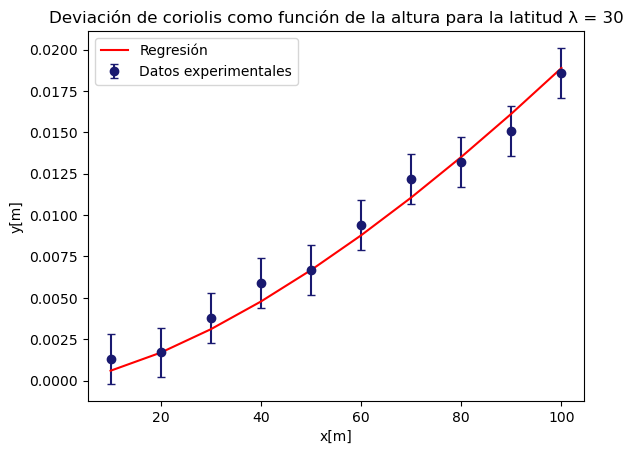

In [40]:
x = DF['h']
y = DF['y']

def GetModel(h,w=2*np.pi/(24*60*60)):
    y=(2*np.sqrt(2)/3)*w*np.cos(np.pi/180*30)*np.sqrt(h**3/9.81)
    return y

Chi2 = sum(((y-GetModel(x))/DF['sigmay'])**2)

Omega,IOmega=opt(GetModel,x,y,sigma=np.full_like(x,Chi2))

print("ω =",Omega[0], "+/-",np.sqrt(IOmega[0][0]))

Y=GetModel(x,Omega[0])

plt.errorbar(x,y,color= 'midnightblue',yerr=DF['sigmay'],fmt='ko',label="Datos experimentales",capsize=3)
plt.plot(x,Y,color='r',label="Regresión")
plt.ylabel("y[m]")
plt.xlabel("x[m]")
plt.title("Deviación de coriolis como función de la altura para la latitud λ = 30")
plt.legend()

In [5]:
#Parte 2

In [6]:
N = 300
Gravedad = np.zeros(N)
y_nuevo = []
for i in range(N):
    Gravedad[i] = 9.81 + np.random.normal(loc=0, scale=1)
    y_nuevo.append(y + np.random.normal(loc=0, scale=DF['sigmay'], size=len(y)))


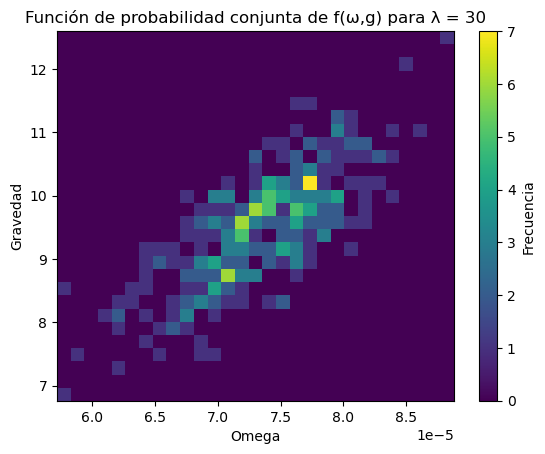

In [7]:
g1 = 0
def GetModel1(h, w=2*np.pi/(24*60*60)):
    y=(2*np.sqrt(2)/3)*w*np.cos(np.pi/180*30)*np.sqrt(h**3/g1)
    return y

Omega1 = []
for i in range(len(Gravedad)):
    g1 = Gravedad[i]
    Chi22 = sum(((y_nuevo[i]-GetModel1(x,i))/DF['sigmay'])**2)
    Omega_1, OInce1 = opt(GetModel1,x, y_nuevo[i], sigma=np.full_like(y_nuevo[i],Chi22))
    Omega1.append(Omega_1[0])

Omega1 = np.array(Omega1)
Omega1 = np.squeeze(Omega1)

binsx = 28
binsy = 29

H2, binsx, binsy = np.histogram2d(Omega1, Gravedad, bins=(binsx, binsy))

plt.imshow(H2, origin='lower', extent=[Omega1.min(), Omega1.max(), Gravedad.min(), Gravedad.max()], aspect='auto')
plt.xlabel('Omega')
plt.ylabel('Gravedad')
plt.colorbar(label='Frecuencia')
plt.title('Función de probabilidad conjunta de f(ω,g) para λ = 30')
plt.show()

In [55]:
print("\033[1mPropagación de la incertidumbre de la aceleración de la gravedad (g)\033[0m")
print("Sí se relacionan por que se logra ver una tendencia a lo largo de la diagonal ascendiente de izquierda a derecha")

Propagación de la incertidumbre de la aceleración de la gravedad (g)
Sí se relacionan por que se logra ver una tendencia a lo largo de la diagonal ascendiente de izquierda a derecha


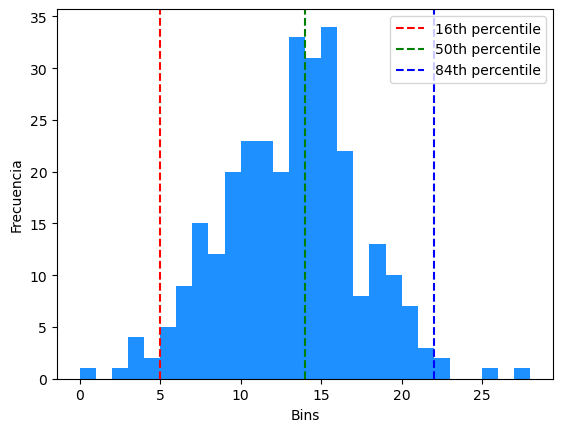

El valor de ω para el ángulo 30 es de:
7.421582259144673e-05
Con valores de intervalo de confianza de 68%:
6.327833158677601e-05 8.39380368178207e-05
Y un σ^+/ω igual a:
0.13099921131231176


In [37]:
datoss = np.linspace(Omega1.min(), Omega1.max(),27)
H1 = np.sum(H2,axis=1)
cs = np.cumsum(H1)
ij = np.searchsorted( cs, np.percentile(cs,16) )
ii = np.searchsorted( cs, np.percentile(cs,50) )
ji = np.searchsorted( cs, np.percentile(cs,84) )

bins = np.arange(len(H1) + 1)

fig, ax = plt.subplots()

ax.bar(bins[:-1], H1, color = 'dodgerblue', width=1, align='edge')

ax.axvline(ij, color='r', linestyle='--', label='16th percentile')
ax.axvline(ii, color='g', linestyle='--', label='50th percentile')
ax.axvline(ji, color='b', linestyle='--', label='84th percentile')

ax.set_xlabel('Bins')
ax.set_ylabel('Frecuencia')
ax.legend()

plt.show()

print("\033[1mEl valor de ω para el ángulo 30 es de:\033[0m")
print(datoss[ii])
print("\033[1mCon valores de intervalo de confianza de 68%:\033[0m")
print(datoss[ij], datoss[ji])
print("\033[1mY un σ^+/ω igual a:\033[0m")
print((datoss[ji]-datoss[ii])/(datoss[ii]))





No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


      λ         ω                                             IC68%     σ^+/ω
0  10.0  0.000081    [7.177572611349993e-05, 9.114896155923092e-05]  0.118909
1  20.0  0.000078     [6.82864247113986e-05, 8.831022284694177e-05]  0.127869
2  30.0  0.000073      [6.35158284341682e-05, 8.32704487160646e-05]  0.134581
3  40.0  0.000067    [5.854291658714395e-05, 7.538292430242643e-05]  0.125741
4  50.0  0.000049  [4.0632214564900013e-05, 5.8258114293205024e-05]  0.178237
5  60.0  0.000043   [3.5965583306156996e-05, 4.998121388332356e-05]  0.163073


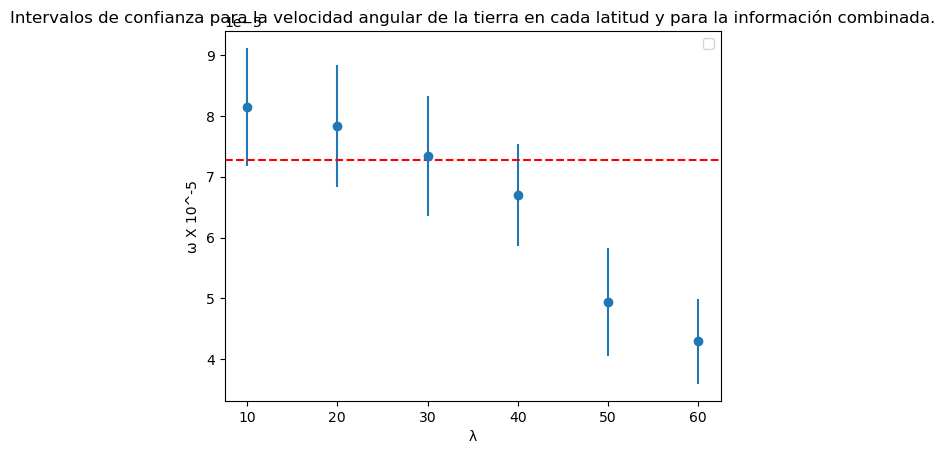

In [54]:
Angulos = Data['angle'].unique()
Datos = {}
Datos['λ'] = Angulos.tolist()
Omegas = []
IC68 = []
sigmaw = []
for k in Angulos:
    g1 = 0
    mask1 = Data['angle']==k
    DF1 = Data[mask1]
    x1 = DF1['h']
    y1 = DF1['y']
    Chi12 = sum(((y1-GetModel(x1))/DF1['sigmay'])**2)
    Omega2,IOmega2=opt(GetModel,x1,y1,sigma=np.full_like(x1,Chi12))    
    N = 300
    Gravedad1 = np.zeros(N)
    y_nuevo1 = []
    for i in range(N):
        Gravedad1[i] = 9.81 + np.random.normal(loc=0, scale=1)
        y_nuevo1.append(y1 + np.random.normal(loc=0, scale=DF1['sigmay'], size=len(y1)))
        
    
    Omega3 = []
    for i in range(len(Gravedad1)):
        g1 = Gravedad1[i]
        Chi23 = sum(((y_nuevo1[i]-GetModel1(x1,g1))/DF1['sigmay'])**2)
        Omega_2, OInce_2 = opt(GetModel1,x1, y_nuevo1[i], sigma=np.full_like(y_nuevo1[i],Chi23))
        Omega3.append(Omega_2[0])

    Omega3 = np.array(Omega3)
    Omega3 = np.squeeze(Omega3)
    
    binsx1 = 28
    binsy1 = 29
    
    H3, binsx1, binsy1 = np.histogram2d(Omega3, Gravedad1, bins=(binsx1, binsy1))
    
    datoss1 = np.linspace(Omega3.min(), Omega3.max(), 28)
    H11 = np.sum(H3,axis=1)
    cs1 = np.cumsum(H11)
    ij1 = np.searchsorted( cs1, np.percentile(cs1,16) )
    ii1 = np.searchsorted( cs1, np.percentile(cs1,50) )
    ji1 = np.searchsorted( cs1, np.percentile(cs1,84) )
    
    Omegas.append(datoss1[ii1])
    ICi = []
    ICi.append(datoss1[ij1])
    ICi.append(datoss1[ji1])
    IC68.append(ICi)
    sigmaw.append((datoss1[ji1]-datoss1[ii1])/(datoss1[ii1]))


Datos['ω'] = Omegas
Datos['IC68%'] = IC68
Datos['σ^+/ω'] = sigmaw

df = pd.DataFrame(Datos)
print(df)
errores = []
for i in range(len(IC68)):
    e = abs(IC68[i]-Omegas[i])
    errores.append(e[0])

plt.errorbar(Angulos, Omegas, yerr=errores, fmt='o')
plt.axhline(y=0.0000727, linestyle='--', color='red')
plt.ylabel("ω X 10^-5")
plt.xlabel("λ")
plt.title("Intervalos de confianza para la velocidad angular de la tierra en cada latitud y para la información combinada.")
plt.legend()
